In [1]:
import ROOT
from ROOT import TMVA

Welcome to JupyROOT 6.14/04


In [2]:
from IPython.core.extensions import ExtensionManager
ExtensionManager(get_ipython()).load_extension("JsMVA.JsMVAMagic")

In [3]:
%jsmva on

In [4]:
inputFile = ROOT.TFile("../data/higgs_small.root")

In [5]:
inputFile.ls()

TFile** ../data/higgs_small.root
TFile* ../data/higgs_small.root
KEY: TTree TreeS;1 TreeS
KEY: TTree TreeB;1 TreeB


In [6]:
TMVA.Tools.Instance()

<ROOT.TMVA::Tools object at 0x55c4f8c19770>

In [7]:
outputFile = ROOT.TFile("Tmva_test.root","RECREATE")

In [8]:
factory = TMVA.Factory("TMVAClassification",outputFile
                      ,"!V:Color:DrawProgressBar:Transformations=I;D;P;G:AnalysisType=CLassification" )

In [9]:
loader = TMVA.DataLoader("dataset");

#add variables (we use the high level ones)
loader.AddVariable("m_jj")
loader.AddVariable("m_jjj")
loader.AddVariable("m_lv")
loader.AddVariable("m_jlv")
loader.AddVariable("m_bb")
loader.AddVariable("m_wbb")
loader.AddVariable("m_wwbb")

In [11]:
mycuts = ROOT.TCut()
mycutb = ROOT.TCut()


loader.AddSignalTree    (inputFile.TreeS,     1.0)   #signal weight  = 1
loader.AddBackgroundTree(inputFile.TreeB, 1.0);   #background weight = 1 

 
loader.PrepareTrainingAndTestTree(SigCut=mycuts, BkgCut=mycutb,
                    nTrain_Signal=1000, nTrain_Background=1000, nTest_Signal=10000, nTest_Background=10000, SplitMode="Random", NormMode="NumEvents", V=False)

Error in callback <bound method StreamCapture.post_execute of <JupyROOT.utils.StreamCapture object at 0x7f16ac105f28>> (for post_execute):


AttributeError: 'range_iterator' object has no attribute 'next'

In [12]:
loader.DrawInputVariable("m_wwbb")

Error in callback <bound method StreamCapture.post_execute of <JupyROOT.utils.StreamCapture object at 0x7f16ac105f28>> (for post_execute):


AttributeError: 'range_iterator' object has no attribute 'next'

In [13]:
loader.DrawCorrelationMatrix("Signal")

In [14]:
factory.BookMethod( loader, TMVA.Types.kBDT, "BDT",
    H=False, V=False, NTrees=850, MinNodeSize="2.5%", MaxDepth=3, BoostType="AdaBoost", AdaBoostBeta=0.5,
                   UseBaggedBoost=True, BaggedSampleFraction=0.5, SeparationType="GiniIndex", nCuts=20 )

<ROOT.TMVA::MethodBDT object ("BDT") at 0x55c4f9ae9960>

Error in callback <bound method StreamCapture.post_execute of <JupyROOT.utils.StreamCapture object at 0x7f16ac105f28>> (for post_execute):


AttributeError: 'range_iterator' object has no attribute 'next'

In [15]:
factory.TrainAllMethods()

Error in callback <bound method StreamCapture.post_execute of <JupyROOT.utils.StreamCapture object at 0x7f16ac105f28>> (for post_execute):


AttributeError: 'range_iterator' object has no attribute 'next'

In [17]:
factory.TestAllMethods();
factory.EvaluateAllMethods();

Error in callback <bound method StreamCapture.post_execute of <JupyROOT.utils.StreamCapture object at 0x7f16ac105f28>> (for post_execute):


AttributeError: 'range_iterator' object has no attribute 'next'

In [18]:
factory.DrawOutputDistribution(loader.GetName(), "BDT")

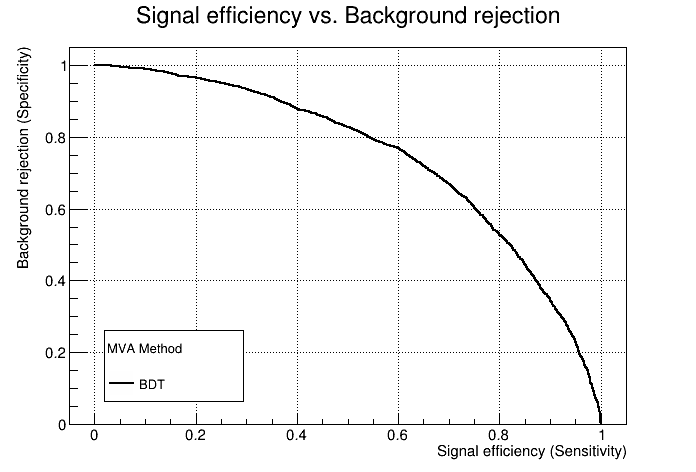

In [19]:
roc = factory.GetROCCurve(loader)
roc.Draw()

In [20]:
print ('ROC integral for BDT = ',factory.GetROCIntegral(loader, 'BDT'))

ROC integral for BDT =  0.7457284935813735
